# KTR Example

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import matplotlib
import matplotlib.pyplot as plt

import orbit
from orbit.models import KTRLite, KTR

from orbit.utils.features import make_fourier_series_df, make_fourier_series
from orbit.diagnostics.plot import plot_predicted_data, plot_predicted_components
from orbit.diagnostics.metrics import smape
from orbit.utils.dataset import load_iclaims, load_electricity_demand

In [2]:
orbit.__version__

'1.1.1dev'

## Data

In [3]:
df = load_iclaims()

DATE_COL = 'week'
RESPONSE_COL = 'claims'

print(df.shape)

df.head()

(443, 7)


week   claims  trend.unemploy  trend.filling  trend.job    sp500  \
0 2010-01-03 13.38660         0.21988       -0.31845    0.11750 -0.41763   
1 2010-01-10 13.62422         0.21988       -0.19484    0.16879 -0.42548   
2 2010-01-17 13.39874         0.23614       -0.29248    0.11750 -0.46523   
3 2010-01-24 13.13755         0.20335       -0.19484    0.10692 -0.48175   
4 2010-01-31 13.19676         0.13436       -0.24247    0.07448 -0.48893   

      vix  
0 0.12265  
1 0.11044  
2 0.53234  
3 0.42864  
4 0.48740

In [4]:
print(f'starts with {df[DATE_COL].min()}\nends with {df[DATE_COL].max()}\nshape: {df.shape}')

starts with 2010-01-03 00:00:00
ends with 2018-06-24 00:00:00
shape: (443, 7)


In [5]:
test_size = 52

train_df = df[:-test_size]
test_df = df[-test_size:]

## KTR

### KTR - Full

### zero regression_segments

In [6]:
ktr = KTR(
    date_col=DATE_COL,
    response_col=RESPONSE_COL,
#     regressor_col=['trend.unemploy', 'trend.filling', 'trend.job'],
        regressor_col=['trend.unemploy'],
    seasonality=[52],
    seasonality_fs_order=[3],
    level_knot_scale=.1,
    level_segments=10,
    regression_segments=0,
    regression_rho=0.15,
    # pyro optimization parameters
    seed=8888,
    num_steps=1000,
    num_sample=1000,
    learning_rate=0.1,
    estimator='pyro-svi',
    n_bootstrap_draws=-1,
    ktrlite_optim_args = dict()
)

In [7]:
ktr.fit(train_df)

INFO:orbit:Optimizing(PyStan) with algorithm:LBFGS .
INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ce583eb84b35032d795f7056cd3c761e NOW.
In file included from /var/folders/2r/w1lk3nxj09s73plknkyzzj5m0000gn/T/pystan_oxaut9yl/stanfit4anon_model_ce583eb84b35032d795f7056cd3c761e_2504781463713120771.cpp:771:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/numpy/core/include/numpy/arrayobject.h:4:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/numpy/core/include/numpy/ndarraytypes.h:1969:
/Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]

In file included from /var/folders/2r/w1lk3nxj09s73plknkyzzj5m0000gn/T/pystan_oxaut9yl/stanfit4anon_model_ce583eb84b35032d795f7056cd3c761e_2504781463713120771.cpp:780:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages

In file included from /var/folders/2r/w1lk3nxj09s73plknkyzzj5m0000gn/T/pystan_oxaut9yl/stanfit4anon_model_ce583eb84b35032d795f7056cd3c761e_2504781463713120771.cpp:781:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan_fit.hpp:15:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/additive_combine.hpp:27:
/Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/linear_congruential.hpp:140:20: warning: overlapping comparisons always evaluate to false [-Wtautological-overlap-compare]
        if(_x <= 0 && _x != 0) {
           ~~~~~~~~^~~~~~~~~~
/Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/boost_1.69.0/boost/random/linear_congruential.hpp:393:11: note: in instantiation of member function 'boost::ran

In file included from /var/folders/2r/w1lk3nxj09s73plknkyzzj5m0000gn/T/pystan_oxaut9yl/stanfit4anon_model_ce583eb84b35032d795f7056cd3c761e_2504781463713120771.cpp:780:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages

In file included from /var/folders/2r/w1lk3nxj09s73plknkyzzj5m0000gn/T/pystan_oxaut9yl/stanfit4anon_model_ce583eb84b35032d795f7056cd3c761e_2504781463713120771.cpp:780:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages

In file included from /var/folders/2r/w1lk3nxj09s73plknkyzzj5m0000gn/T/pystan_oxaut9yl/stanfit4anon_model_ce583eb84b35032d795f7056cd3c761e_2504781463713120771.cpp:780:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages

In file included from /var/folders/2r/w1lk3nxj09s73plknkyzzj5m0000gn/T/pystan_oxaut9yl/stanfit4anon_model_ce583eb84b35032d795f7056cd3c761e_2504781463713120771.cpp:780:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages

In file included from /var/folders/2r/w1lk3nxj09s73plknkyzzj5m0000gn/T/pystan_oxaut9yl/stanfit4anon_model_ce583eb84b35032d795f7056cd3c761e_2504781463713120771.cpp:780:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages

In file included from /var/folders/2r/w1lk3nxj09s73plknkyzzj5m0000gn/T/pystan_oxaut9yl/stanfit4anon_model_ce583eb84b35032d795f7056cd3c761e_2504781463713120771.cpp:780:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages

In file included from /var/folders/2r/w1lk3nxj09s73plknkyzzj5m0000gn/T/pystan_oxaut9yl/stanfit4anon_model_ce583eb84b35032d795f7056cd3c761e_2504781463713120771.cpp:780:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages

In file included from /var/folders/2r/w1lk3nxj09s73plknkyzzj5m0000gn/T/pystan_oxaut9yl/stanfit4anon_model_ce583eb84b35032d795f7056cd3c761e_2504781463713120771.cpp:780:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages

In file included from /var/folders/2r/w1lk3nxj09s73plknkyzzj5m0000gn/T/pystan_oxaut9yl/stanfit4anon_model_ce583eb84b35032d795f7056cd3c761e_2504781463713120771.cpp:780:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/py_var_context.hpp:12:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/src/stan/io/dump.hpp:6:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat.hpp:9:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/stan/math/prim/mat/meta/as_array_or_scalar.hpp:4:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages/pystan/stan/lib/stan_math/lib/eigen_3.3.3/Eigen/Dense:1:
In file included from /Users/gavin.steininger/.pyenv/versions/3.7.12/lib/python3.7/site-packages

165 warnings generated.
INFO:orbit:Using SVI(Pyro) with steps:1000 , samples:1000 , learning rate:0.1, learning_rate_total_decay:1.0 and particles:100.
INFO:root:Guessed max_plate_nesting = 1
INFO:orbit:step    0 loss = -129.28, scale = 0.08837
INFO:orbit:step  100 loss = -352.57, scale = 0.03726
INFO:orbit:step  200 loss = -351.47, scale = 0.034317
INFO:orbit:step  300 loss = -352.31, scale = 0.037732
INFO:orbit:step  400 loss = -352.89, scale = 0.036369
INFO:orbit:step  500 loss = -354.05, scale = 0.036469
INFO:orbit:step  600 loss = -354.12, scale = 0.038294
INFO:orbit:step  700 loss = -351.81, scale = 0.039109
INFO:orbit:step  800 loss = -355.12, scale = 0.037118
INFO:orbit:step  900 loss = -353.15, scale = 0.037624


In [8]:
coef_df = ktr.get_regression_coefs()
coef_df

week  trend.unemploy
0   2010-01-03         0.09653
1   2010-01-10         0.09653
2   2010-01-17         0.09653
3   2010-01-24         0.09653
4   2010-01-31         0.09653
..         ...             ...
386 2017-05-28         0.09653
387 2017-06-04         0.09653
388 2017-06-11         0.09653
389 2017-06-18         0.09653
390 2017-06-25         0.09653

[391 rows x 2 columns]

In [9]:
knot_df = ktr.get_regression_coef_knots()
knot_df

week  step  trend.unemploy
0 2010-01-03     0         0.09653

In [10]:
ktr.get_regression_coefs().head()

week  trend.unemploy
0 2010-01-03         0.09653
1 2010-01-10         0.09653
2 2010-01-17         0.09653
3 2010-01-24         0.09653
4 2010-01-31         0.09653

In [11]:
ktr.get_regression_coef_knots()

week  step  trend.unemploy
0 2010-01-03     0         0.09653

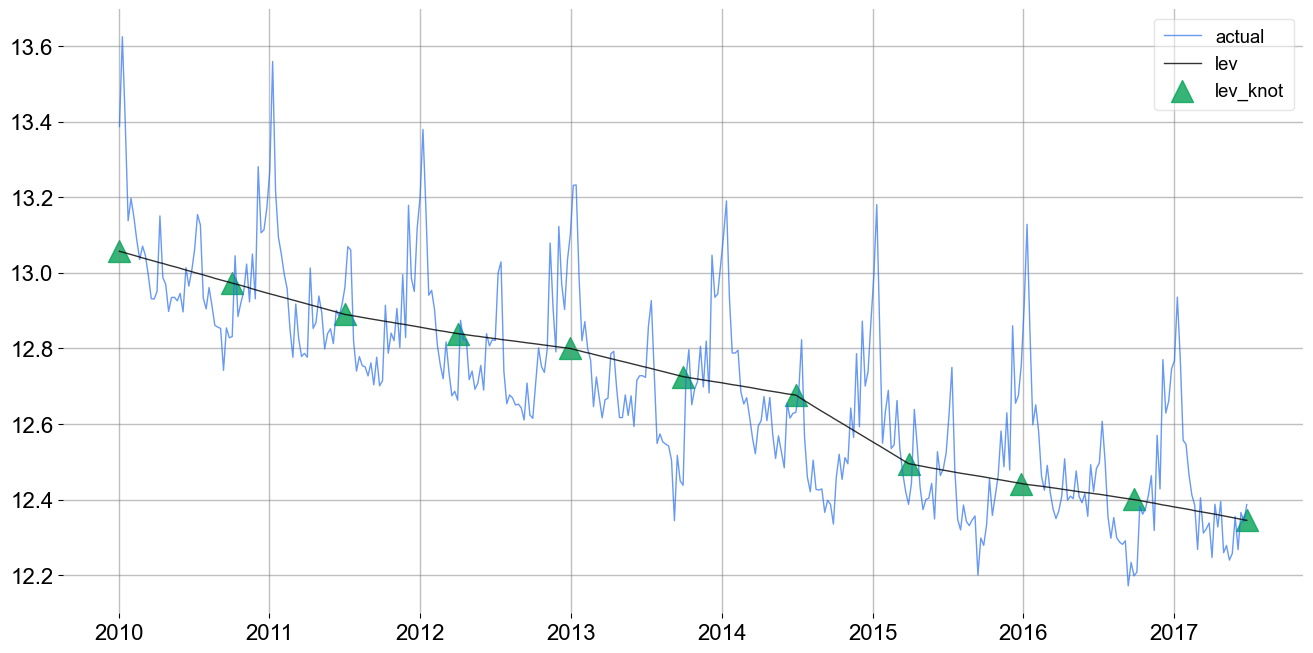

In [12]:
ktr.plot_lev_knots(figsize=(16, 8));

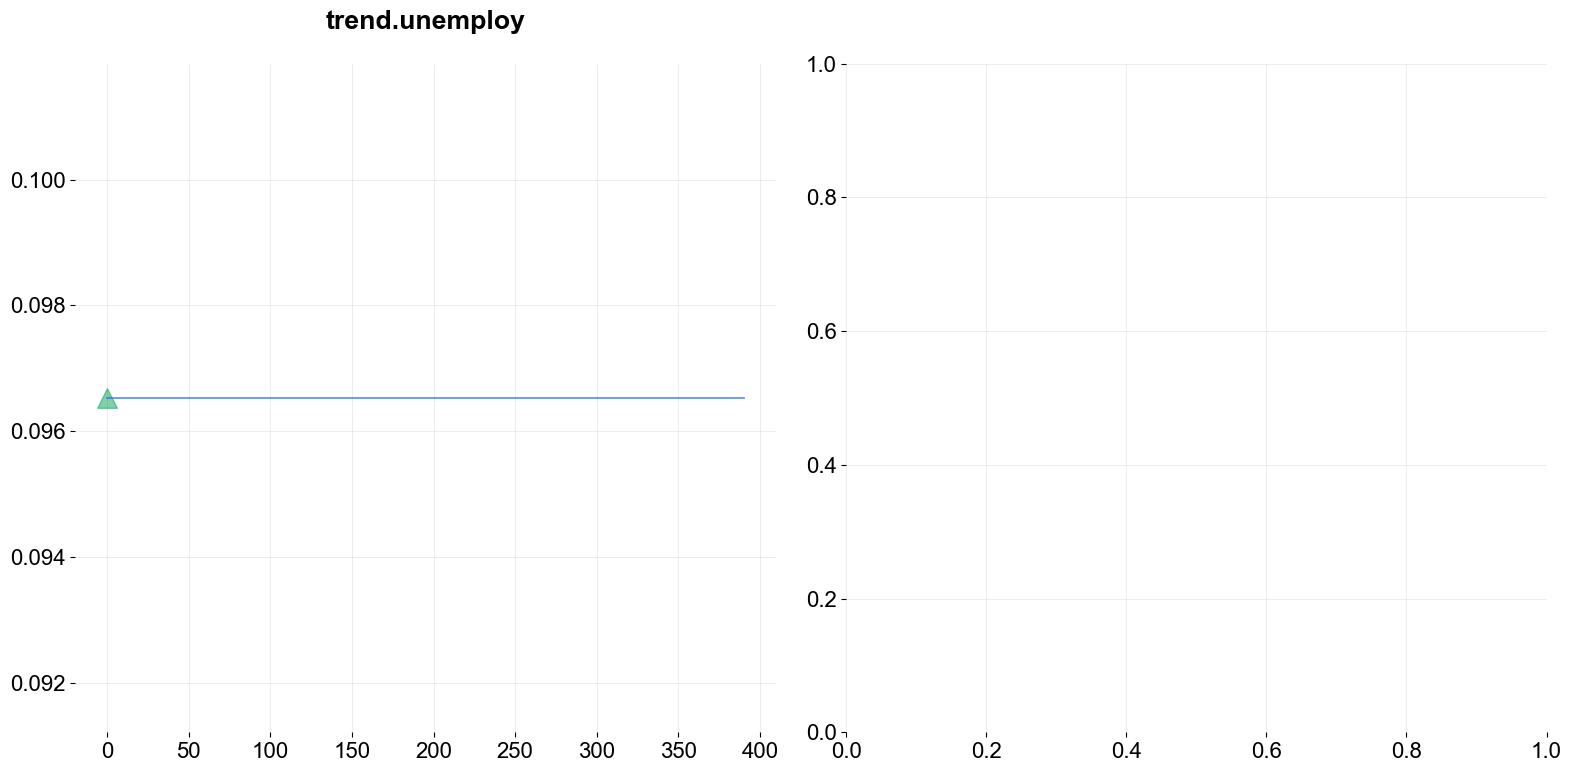

In [13]:
ktr.plot_regression_coefs(with_knot=True, include_ci=False, figsize=(16, 8));

In [14]:
predicted_df = ktr.predict(df=test_df, decompose=True)
predicted_df.head()

week  prediction_5  prediction  prediction_95  trend_5    trend  \
0 2017-07-02      12.18674    12.34466       12.50898 12.18138 12.33745   
1 2017-07-09      12.19311    12.35454       12.50465 12.19271 12.35026   
2 2017-07-16      12.17019    12.32331       12.49775 12.18430 12.33771   
3 2017-07-23      12.14305    12.31592       12.46666 12.17380 12.34777   
4 2017-07-30      12.13637    12.29054       12.45037 12.18249 12.33905   

   trend_95  regression_5  regression  regression_95  seasonality_52_5  \
0  12.50050       0.01329     0.02123        0.02894          -0.01367   
1  12.50263       0.01524     0.02434        0.03319          -0.02090   
2  12.51030       0.01127     0.01801        0.02455          -0.03211   
3  12.49755       0.01024     0.01636        0.02230          -0.04732   
4  12.50050       0.01127     0.01801        0.02455          -0.06621   

   seasonality_52  seasonality_52_95  
0        -0.01367           -0.01367  
1        -0.02090           -0.02090  
2        -0.03211           -0.03211  
3        -0.04732           -0.04732  
4        -0.06621           -0.06621

In [15]:
f"SMAPE: {smape(predicted_df['prediction'].values, test_df[RESPONSE_COL].values):.2%}"

'SMAPE: 0.73%'

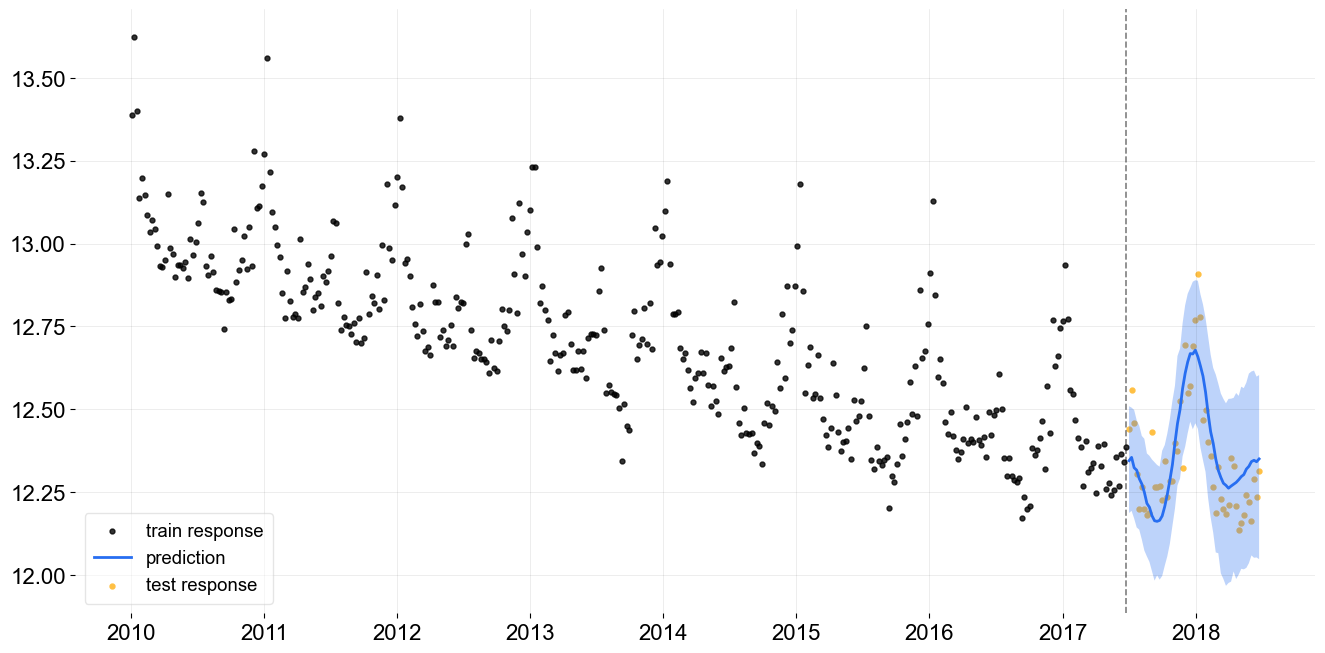

In [16]:
_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df,
                        date_col=DATE_COL,
                        actual_col=RESPONSE_COL,
                        test_actual_df=test_df)

### multiple regression_segments

Change `regression_segments=0` args to `regression_segments=5`.

In [18]:
ktr = KTR(
    date_col=DATE_COL,
    response_col=RESPONSE_COL,
    # regressor_col=['trend.unemploy', 'trend.filling', 'trend.job'],
    regressor_col=['trend.unemploy'],
    seasonality=[52],
    seasonality_fs_order=[3],
    level_knot_scale=.1,
    level_segments=10,
    regression_segments=5,
    regression_rho=0.15,
    # pyro optimization parameters
    seed=8888,
    num_steps=1000,
    num_sample=1000,
    learning_rate=0.1,
    estimator='pyro-svi',
    n_bootstrap_draws=-1,
    ktrlite_optim_args = dict()
)

In [19]:
ktr.fit(train_df)

INFO:orbit:Optimizing(PyStan) with algorithm:LBFGS .
INFO:orbit:Using SVI(Pyro) with steps:1000 , samples:1000 , learning rate:0.1, learning_rate_total_decay:1.0 and particles:100 .
INFO:root:Guessed max_plate_nesting = 1
INFO:orbit:step    0 loss = -122.05, scale = 0.084961
INFO:orbit:step  100 loss = -352.24, scale = 0.046498
INFO:orbit:step  200 loss = -354.46, scale = 0.050182
INFO:orbit:step  300 loss = -352.78, scale = 0.048628
INFO:orbit:step  400 loss = -349.38, scale = 0.049816
INFO:orbit:step  500 loss = -351.55, scale = 0.049404
INFO:orbit:step  600 loss = -350.36, scale = 0.049911
INFO:orbit:step  700 loss = -352.88, scale = 0.050363
INFO:orbit:step  800 loss = -353.24, scale = 0.050048
INFO:orbit:step  900 loss = -351.19, scale = 0.049696


In [20]:
ktr.get_regression_coefs().head()

week  trend.unemploy
0 2010-01-03         0.10386
1 2010-01-10         0.10377
2 2010-01-17         0.10367
3 2010-01-24         0.10357
4 2010-01-31         0.10348

In [21]:
ktr.get_regression_coef_knots()

week  step  trend.unemploy
0 2010-01-03     0         0.11035
1 2011-07-03    78         0.08710
2 2012-12-30   156         0.11927
3 2014-06-29   234         0.06504
4 2015-12-27   312         0.09255
5 2017-06-25   390         0.13490

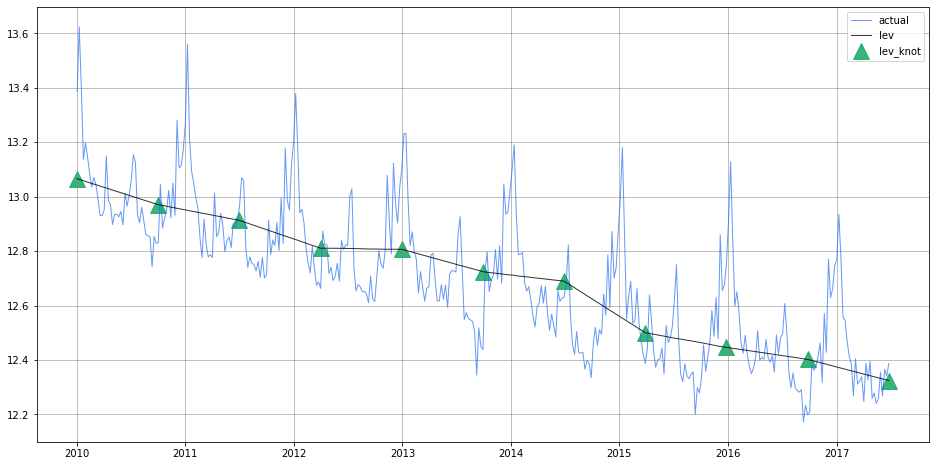

In [22]:
ktr.plot_lev_knots(figsize=(16, 8), use_orbit_style=False);

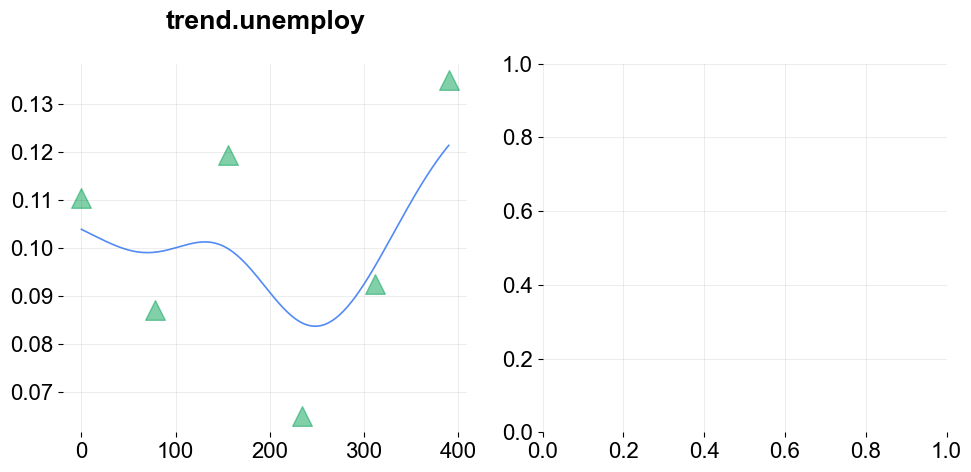

In [23]:
ktr.plot_regression_coefs(with_knot=True, figsize=(10, 5), include_ci=False);

In [24]:
predicted_df = ktr.predict(df=test_df, decompose=True)
predicted_df.head()

week  prediction_5  prediction  prediction_95  trend_5    trend  \
0 2017-07-02      12.17602    12.33509       12.49622 12.16346 12.32028   
1 2017-07-09      12.17908    12.33787       12.48704 12.16675 12.32876   
2 2017-07-16      12.15634    12.31097       12.47849 12.16617 12.32353   
3 2017-07-23      12.13226    12.29340       12.45650 12.15828 12.31989   
4 2017-07-30      12.12414    12.27593       12.43266 12.16706 12.32113   

   trend_95  regression_5  regression  regression_95  seasonality_52_5  \
0  12.48274       0.00148     0.02692        0.05021          -0.01367   
1  12.48605       0.00170     0.03087        0.05757          -0.02090   
2  12.48354       0.00126     0.02284        0.04260          -0.03211   
3  12.48232       0.00114     0.02075        0.03869          -0.04732   
4  12.47936       0.00126     0.02284        0.04260          -0.06621   

   seasonality_52  seasonality_52_95  
0        -0.01367           -0.01367  
1        -0.02090           -0.02090  
2        -0.03211           -0.03211  
3        -0.04732           -0.04732  
4        -0.06621           -0.06621

In [25]:
f"SMAPE: {smape(predicted_df['prediction'].values, test_df[RESPONSE_COL].values):.2%}"

'SMAPE: 0.71%'

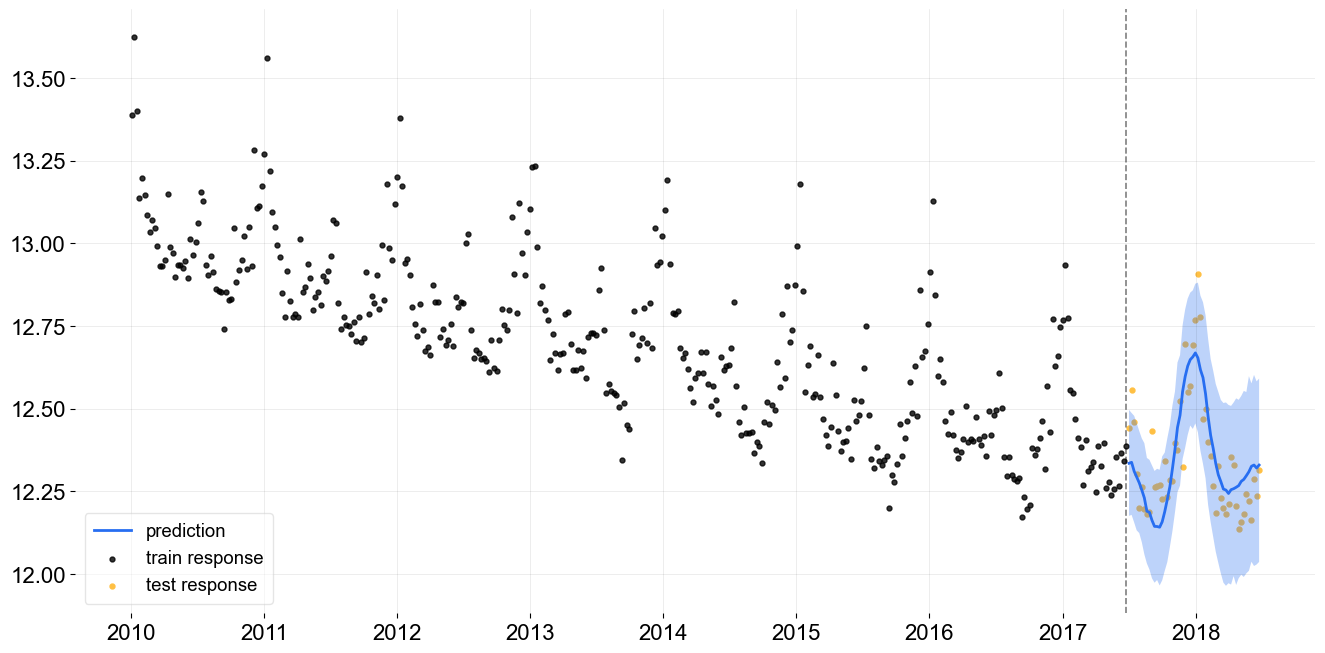

In [26]:
_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df,
                        date_col=DATE_COL,
                        actual_col=RESPONSE_COL,
                        test_actual_df=test_df)

In [27]:
knot_df = ktr.get_regression_coef_knots()
knot_df

week  step  trend.unemploy
0 2010-01-03     0         0.11035
1 2011-07-03    78         0.08710
2 2012-12-30   156         0.11927
3 2014-06-29   234         0.06504
4 2015-12-27   312         0.09255
5 2017-06-25   390         0.13490

### KTR - Median

INFO:orbit:Optimizing(PyStan) with algorithm:LBFGS .
INFO:orbit:Using SVI(Pyro) with steps:1000 , samples:1000 , learning rate:0.1, learning_rate_total_decay:1.0 and particles:100 .
INFO:root:Guessed max_plate_nesting = 1
INFO:orbit:step    0 loss = 31.752, scale = 0.096946
INFO:orbit:step  100 loss = -346.54, scale = 0.073014
INFO:orbit:step  200 loss = -347.01, scale = 0.072465
INFO:orbit:step  300 loss = -348.48, scale = 0.073846
INFO:orbit:step  400 loss = -345.43, scale = 0.073653
INFO:orbit:step  500 loss = -344.18, scale = 0.072283
INFO:orbit:step  600 loss = -345.95, scale = 0.07405
INFO:orbit:step  700 loss = -346.15, scale = 0.073452
INFO:orbit:step  800 loss = -343.87, scale = 0.076183
INFO:orbit:step  900 loss = -344.45, scale = 0.074191


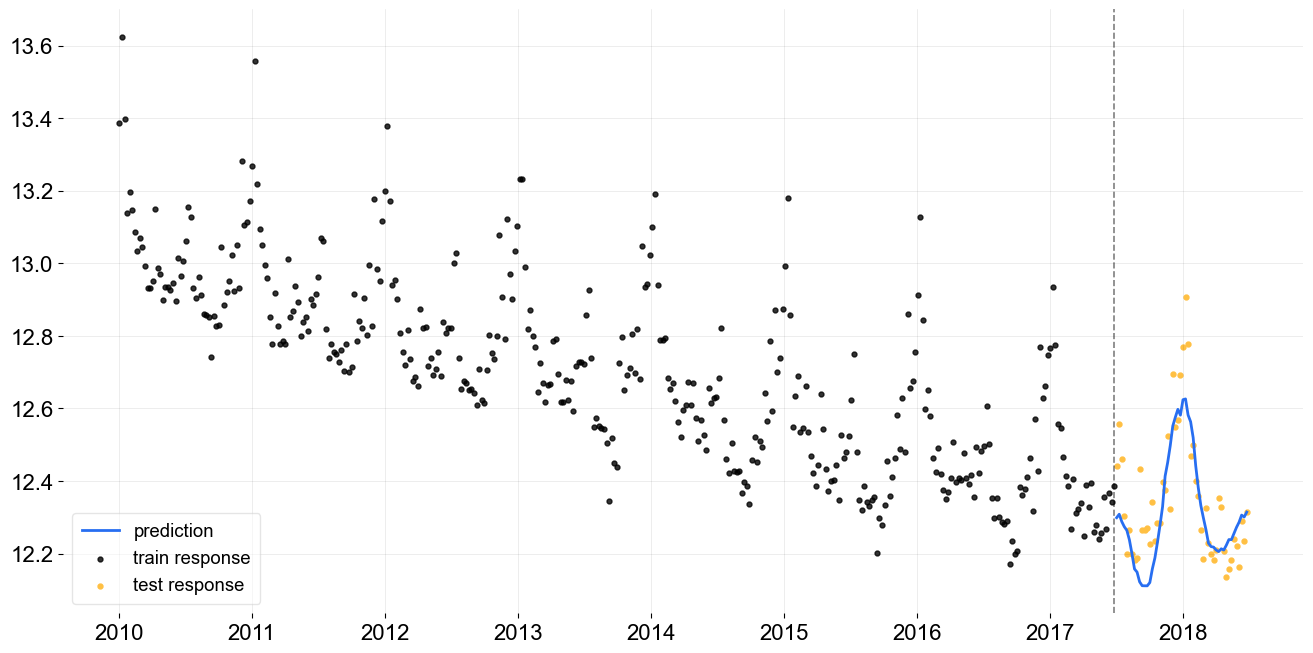

In [28]:
ktr = KTR(
    date_col=DATE_COL,
    response_col=RESPONSE_COL,
    regressor_col=['trend.unemploy', 'trend.filling', 'trend.job'],
    seasonality=[52],
    seasonality_fs_order=[3],
    level_knot_scale=.1,
    level_segments=10,
    seasonality_segments=2,
    regression_segments=5,
    regression_rho=0.15,
    # pyro optimization parameters
    seed=8888,
    num_steps=1000,
    num_sample=1000,
    learning_rate=0.1,
    estimator='pyro-svi',
    n_bootstrap_draws=-1
)

ktr.fit(df=train_df, point_method='median')
ktr.get_regression_coefs().head()

predicted_df = ktr.predict(df=test_df, decompose=True)
predicted_df.tail()

f"SMAPE: {smape(predicted_df['prediction'].values, test_df[RESPONSE_COL].values):.2%}"

_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df,
                        date_col=DATE_COL,
                        actual_col=RESPONSE_COL,
                        test_actual_df=test_df)

## Electricity data (dual seasoanlity, no regressor)

In [29]:
# from 2000-01-01 to 2008-12-31
df = load_electricity_demand()

df['electricity'] = np.log(df['electricity'])

DATE_COL = 'date'
RESPONSE_COL = 'electricity'

print(df.shape)
df.head()

(3288, 2)


date  electricity
0 2000-01-01      9.43760
1 2000-01-02      9.50130
2 2000-01-03      9.63565
3 2000-01-04      9.65392
4 2000-01-05      9.66089

In [30]:
test_size = 365

train_df = df[:-test_size]
test_df = df[-test_size:]

In [31]:
ktr = KTR(
    date_col=DATE_COL,
    response_col=RESPONSE_COL,
    seasonality=[7, 365.25],
    seasonality_fs_order=[2, 5],
    level_knot_scale=.1,
    level_segments=20,
    seasonality_segments=3,
    regression_segments=5,
    regression_rho=0.15,
    # pyro optimization parameters
    seed=8888,
    num_steps=1000,
    num_sample=1000,
    learning_rate=0.1,
    estimator='pyro-svi',
    n_bootstrap_draws=-1
)

In [32]:
ktr.fit(df=train_df, point_method='median')

INFO:orbit:Optimizing(PyStan) with algorithm:LBFGS .
INFO:orbit:Using SVI(Pyro) with steps:1000 , samples:1000 , learning rate:0.1, learning_rate_total_decay:1.0 and particles:100 .
INFO:root:Guessed max_plate_nesting = 1
INFO:orbit:step    0 loss = -2427.7, scale = 0.081873
INFO:orbit:step  100 loss = -4735.7, scale = 0.0060206
INFO:orbit:step  200 loss = -4709.7, scale = 0.00632
INFO:orbit:step  300 loss = -4652.6, scale = 0.006399
INFO:orbit:step  400 loss = -4574.9, scale = 0.0064561
INFO:orbit:step  500 loss = -4710.8, scale = 0.0063456
INFO:orbit:step  600 loss = -4674.2, scale = 0.0064545
INFO:orbit:step  700 loss = -4689.3, scale = 0.006469
INFO:orbit:step  800 loss = -4655.4, scale = 0.0062099
INFO:orbit:step  900 loss = -4657.3, scale = 0.0063414


In [33]:
predicted_df = ktr.predict(df=test_df, decompose=True)
predicted_df.tail()

date  prediction   trend  regression  seasonality_7  \
360 2008-12-27     9.97291 9.99328     0.00000       -0.02937   
361 2008-12-28     9.91402 9.99328     0.00000       -0.08773   
362 2008-12-29     9.97976 9.99328     0.00000       -0.02162   
363 2008-12-30    10.04459 9.99328     0.00000        0.04336   
364 2008-12-31    10.02630 9.99328     0.00000        0.02505   

     seasonality_365.25  
360             0.00900  
361             0.00846  
362             0.00810  
363             0.00794  
364             0.00797

In [34]:
f"SMAPE: {smape(predicted_df['prediction'].values, test_df[RESPONSE_COL].values):.2%}"

'SMAPE: 0.49%'

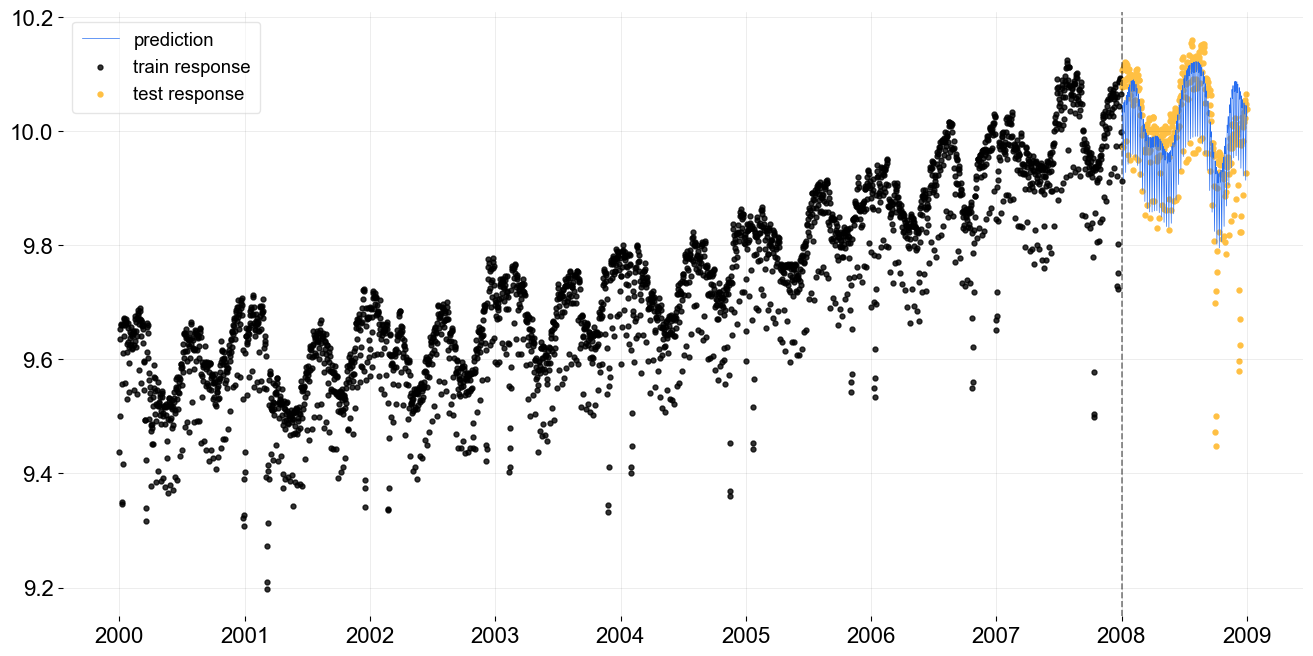

In [35]:
_ = plot_predicted_data(training_actual_df=train_df,
                        predicted_df=predicted_df,
                        date_col=DATE_COL,
                        actual_col=RESPONSE_COL,
                        test_actual_df=test_df,
                       lw=0.5)